In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import Point
df = gpd.read_file('/data/acker/ALA/paper2/washu_2021-2023_merged.shp')
df

,index,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,ID,Design Val,geometry
0,0,02090,14.333333,02,090,1,02_090,12.1,"POLYGON ((-148.66326 64.59079, -148.64821 64.5..."
1,1,06063,14.200000,06,063,2,06_063,14.0,"POLYGON ((-121.49703 40.43702, -121.49487 40.4..."
2,2,06107,12.933334,06,107,4,06_107,15.7,"POLYGON ((-119.56647 36.49434, -119.56366 36.4..."
3,3,06023,12.633334,06,023,5,06_023,6.9,"POLYGON ((-124.4086 40.4432, -124.39664 40.462..."
4,4,06029,12.599999,06,029,6,06_029,16.2,"POLYGON ((-120.19437 35.78936, -120.00308 35.7..."
...,...,...,...,...,...,...,...,...,...
531,531,02020,4.133333,02,020,3118,02_020,5.1,"MULTIPOLYGON (((-150.07348 61.15834, -150.0691..."
532,532,02110,3.900000,02,110,3128,02_110,4.6,"MULTIPOLYGON (((-134.66932 58.33327, -134.6675..."
533,533,15001,3.633333,15,001,3133,15_001,4.4,"POLYGON ((-156.06147 19.72813, -156.06076 19.7..."
534,534,15009,3.556667,15,009,3136,15_009,4.0,"MULTIPOLYGON (((-156.69742 20.91637, -156.6957..."


In [4]:
df = df.rename(columns={'Design Val':'Design Value'})

In [5]:
#upload shapefile of U.S. counties
counties = gpd.read_file('/data/acker/shapefiles/cb_2020_us_county_500k.shp')

In [6]:
# List of state abbreviations for CONUS, Alaska (AK), and Hawaii (HI)
states_to_include = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'DC',
    'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
    'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
    'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
    'WI', 'WY'
]

# Filter counties to only include rows where STUSPS is in the specified list
counties_conus = counties[counties['STUSPS'].isin(states_to_include)]

# Display the filtered counties
counties_conus

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,13,031,00350302,0500000US13031,13031,Bulloch,Bulloch County,GA,Georgia,06,1750735216,32827779,"POLYGON ((-82.02684 32.55516, -82.02527 32.558..."
1,13,121,01694833,0500000US13121,13121,Fulton,Fulton County,GA,Georgia,06,1364133162,19666288,"POLYGON ((-84.84931 33.51318, -84.84429 33.514..."
2,13,179,00357095,0500000US13179,13179,Liberty,Liberty County,GA,Georgia,06,1337654102,222884791,"POLYGON ((-81.8244 32.01488, -81.81338 32.0162..."
3,13,189,00348794,0500000US13189,13189,McDuffie,McDuffie County,GA,Georgia,06,666590014,23114032,"POLYGON ((-82.64852 33.60838, -82.64409 33.606..."
4,13,213,01688005,0500000US13213,13213,Murray,Murray County,GA,Georgia,06,892235145,5719644,"POLYGON ((-84.94434 34.68004, -84.9431 34.6804..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,41,049,01135860,0500000US41049,41049,Morrow,Morrow County,OR,Oregon,06,5259046087,44372730,"POLYGON ((-120.00631 45.27648, -120.00556 45.3..."
3229,21,073,00516883,0500000US21073,21073,Franklin,Franklin County,KY,Kentucky,06,538312209,10786432,"POLYGON ((-85.02426 38.13059, -85.02299 38.131..."
3230,17,201,01785216,0500000US17201,17201,Winnebago,Winnebago County,IL,Illinois,06,1328792556,15873993,"POLYGON ((-89.40142 42.50043, -89.37175 42.500..."
3231,17,123,00424260,0500000US17123,17123,Marshall,Marshall County,IL,Illinois,06,1001843226,30364348,"POLYGON ((-89.63869 40.98691, -89.63868 40.988..."


In [7]:
counties_conus = counties_conus.drop(["COUNTYNS", 'NAMELSAD', 'LSAD', 'ALAND', 'AWATER', 'AFFGEOID'], axis=1)

In [8]:
counties_conus = counties_conus.to_crs(df.crs)

In [9]:
merged_df = df

In [10]:
merged_df['diff'] =  merged_df['PM25_90th'] - merged_df['Design Value']
merged_df['diff'].describe()

count    536.000000
mean       0.064832
std        1.227862
min       -5.333334
25%       -0.533333
50%        0.133334
75%        0.775000
max        5.733334
Name: diff, dtype: float64

In [11]:
# Define threshold
threshold = 9.0

# Function to classify each row
def classify(row):
    cdv = row['Design Value']
    cdve = row['PM25_90th']
    if cdv > threshold and cdve > threshold:
        return 'TP'
    elif cdv > threshold and cdve <= threshold:
        return 'FN'
    elif cdv <= threshold and cdve > threshold:
        return 'FP'
    else:
        return 'TN'

# Apply the classification
merged_df['classification'] = merged_df.apply(classify, axis=1)

# Print counts
print(merged_df['classification'].value_counts())

# Optional: filter into separate DataFrames
TP = merged_df[merged_df['classification'] == 'TP']
FP = merged_df[merged_df['classification'] == 'FP']
FN = merged_df[merged_df['classification'] == 'FN']
TN = merged_df[merged_df['classification'] == 'TN']
print('TP:',len(TP))
print('FP:',len(FP))
print('FN:', len(FN))
print('TN:',len(TN))

classification
TN    376
TP     63
FN     52
FP     45
Name: count, dtype: int64
TP: 63
FP: 45
FN: 52
TN: 376


In [12]:
FN['diff'].describe()

count    52.000000
mean     -1.683333
std       1.192921
min      -5.333334
25%      -2.266667
50%      -1.416667
75%      -0.612500
max      -0.133334
Name: diff, dtype: float64

In [16]:
# Define threshold
threshold = 9.0

# Create a copy to avoid modifying original
FN_sensitivity = FN.copy()

# Define classification function
def classify(cdv, cdve, threshold=threshold):
    if cdv > threshold and cdve > threshold:
        return "TP"
    elif cdv <= threshold and cdve <= threshold:
        return "TN"
    elif cdv <= threshold and cdve > threshold:
        return "FP"
    else:  # cdv > threshold and cdve <= threshold
        return "FN"

# Perturbation values
cdv_changes = [-0.5, 0, +0.5]
cdve_changes = [-0.5, 0, +0.5]

# Apply all combinations
for delta_cdv in cdv_changes:
    for delta_cdve in cdve_changes:
        col_name = f"class_cdv{delta_cdv:+.1f}_cdve{delta_cdve:+.1f}"
        FN_sensitivity[col_name] = FN_sensitivity.apply(
            lambda row: classify(row['Design Value'] + delta_cdv,
                                 row['PM25_90th'] + delta_cdve),
            axis=1
        )

# Summarize results
summary = {}
for delta_cdv in cdv_changes:
    for delta_cdve in cdve_changes:
        col_name = f"class_cdv{delta_cdv:+.1f}_cdve{delta_cdve:+.1f}"
        counts = FN_sensitivity[col_name].value_counts()
        summary[col_name] = counts

# Print summary nicely
for perturbation, counts in summary.items():
    print(f"\nPerturbation: {perturbation}")
    print(counts)



Perturbation: class_cdv-0.5_cdve-0.5
class_cdv-0.5_cdve-0.5
FN    27
TN    25
Name: count, dtype: int64

Perturbation: class_cdv-0.5_cdve+0.0
class_cdv-0.5_cdve+0.0
FN    27
TN    25
Name: count, dtype: int64

Perturbation: class_cdv-0.5_cdve+0.5
class_cdv-0.5_cdve+0.5
FN    17
FP    14
TN    11
TP    10
Name: count, dtype: int64

Perturbation: class_cdv+0.0_cdve-0.5
class_cdv+0.0_cdve-0.5
FN    52
Name: count, dtype: int64

Perturbation: class_cdv+0.0_cdve+0.0
class_cdv+0.0_cdve+0.0
FN    52
Name: count, dtype: int64

Perturbation: class_cdv+0.0_cdve+0.5
class_cdv+0.0_cdve+0.5
FN    28
TP    24
Name: count, dtype: int64

Perturbation: class_cdv+0.5_cdve-0.5
class_cdv+0.5_cdve-0.5
FN    52
Name: count, dtype: int64

Perturbation: class_cdv+0.5_cdve+0.0
class_cdv+0.5_cdve+0.0
FN    52
Name: count, dtype: int64

Perturbation: class_cdv+0.5_cdve+0.5
class_cdv+0.5_cdve+0.5
FN    28
TP    24
Name: count, dtype: int64


In [14]:
# Define threshold and margin
threshold = 9.0
margin = 0.5  # Adjust to 1.0 for a ±1.0 µg/m³ range

# Calculate the absolute difference between CDVE and the threshold
FN['cdve_diff'] = abs(FN['PM25_90th'] - threshold)

# Identify near-miss counties
FN['near_miss1'] = FN['cdve_diff'] <= margin

# Optional: Count the number of near-miss counties
num_near_miss = FN['near_miss1'].sum()
print(f"Number of near-miss counties (±{margin} µg/m³): {num_near_miss}")
# Define threshold and margin
threshold = 9.0
margin = 0.5  # Adjust to 1.0 for a ±1.0 µg/m³ range

# Calculate the absolute difference between CDV and the threshold
FN['cdv_diff'] = abs(FN['Design Value'] - threshold)

# Identify near-miss counties
FN['near_miss2'] = FN['cdv_diff'] <= margin

# Optional: Count the number of near-miss counties
num_near_miss = FN['near_miss2'].sum()
print(f"Number of near-miss counties (±{margin} µg/m³): {num_near_miss}")
both = FN[(FN['near_miss1'] == True) & (FN['near_miss2'] == True)]
both['diff'].describe()

Number of near-miss counties (±0.5 µg/m³): 24
Number of near-miss counties (±0.5 µg/m³): 25


/home/acker/miniconda3/envs/tempo/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/acker/miniconda3/envs/tempo/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/acker/miniconda3/envs/tempo/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

count    14.000000
mean     -0.498810
std       0.231722
min      -0.933333
25%      -0.591667
50%      -0.541667
75%      -0.283334
max      -0.133334
Name: diff, dtype: float64

In [15]:
both

,index,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,ID,Design Value,geometry,diff,classification,cdv_above,cdve_above,near_miss_cdv,near_miss_cdve,cdve_diff,near_miss1,cdv_diff,near_miss2
114,114,26081,8.966666,26,081,187,26_081,9.3,"POLYGON ((-85.79061 43.20987, -85.79056 43.226...",-0.333334,FN,True,False,True,True,0.033334,True,0.3,True
115,115,22121,8.966666,22,121,187,22_121,9.1,"POLYGON ((-91.48156 30.49742, -91.48173 30.511...",-0.133334,FN,True,False,True,True,0.033334,True,0.1,True
116,116,28035,8.966666,28,035,187,28_035,9.2,"POLYGON ((-89.45162 31.43403, -89.44455 31.434...",-0.233334,FN,True,False,True,True,0.033334,True,0.2,True
119,119,37119,8.933333,37,119,196,37_119,9.2,"POLYGON ((-81.05803 35.07319, -81.05768 35.078...",-0.266667,FN,True,False,True,True,0.066667,True,0.2,True
125,125,18141,8.866667,18,141,210,18_141,9.4,"POLYGON ((-86.52648 41.65768, -86.52601 41.672...",-0.533333,FN,True,False,True,True,0.133333,True,0.4,True
131,131,47093,8.833333,47,093,221,47_093,9.1,"POLYGON ((-84.27347 35.93928, -84.27155 35.942...",-0.266667,FN,True,False,True,True,0.166667,True,0.1,True
134,134,34039,8.833333,34,039,221,34_039,9.4,"POLYGON ((-74.46329 40.59919, -74.45988 40.600...",-0.566667,FN,True,False,True,True,0.166667,True,0.4,True
137,137,13021,8.800000,13,021,236,13_021,9.4,"POLYGON ((-83.892 32.83254, -83.89192 32.84835...",-0.600000,FN,True,False,True,True,0.200000,True,0.4,True
146,146,49035,8.750000,49,035,260,49_035,9.3,"POLYGON ((-112.26022 40.76909, -112.19598 40.8...",-0.550000,FN,True,False,True,True,0.250000,True,0.3,True
148,148,26161,8.733334,26,161,261,26_161,9.3,"POLYGON ((-84.13406 42.16925, -84.13365 42.177...",-0.566666,FN,True,False,True,True,0.266666,True,0.3,True


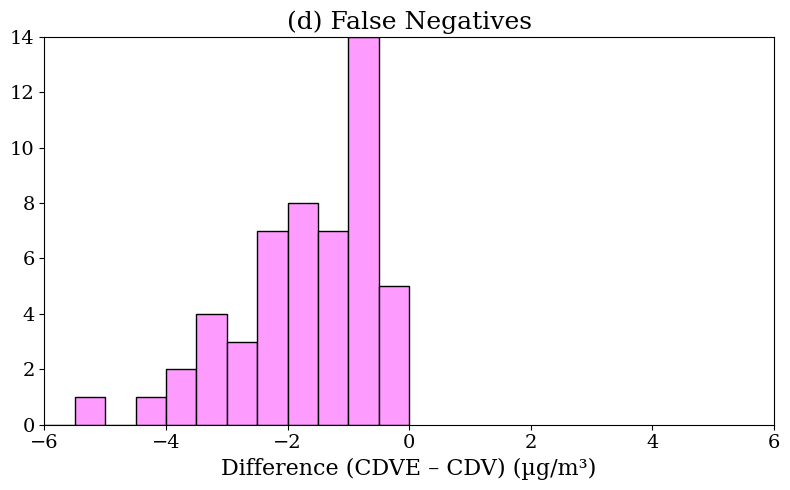

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Determine range of diff values
min_diff = FN['diff'].min()
max_diff = FN['diff'].max()

# Create bin edges spaced 0.5 apart
bins = np.arange(np.floor(min_diff), np.ceil(max_diff) + 0.5, 0.5)

# Plot
plt.figure(figsize=(8, 5))
plt.hist(FN['diff'], bins=bins, color='#fe9bfe', edgecolor='black')
plt.rcParams["font.family"] = "serif"

plt.xlabel('Difference (CDVE – CDV) (µg/m³)', fontsize=16)
plt.ylabel('', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('(d) False Negatives', fontsize=18)
plt.grid(False)
plt.xlim(-6, 6)
plt.ylim(0,14)
plt.rcParams["font.family"] = "serif"
plt.tight_layout()
plt.show()


In [13]:
# Calculate histogram
counts, bin_edges = np.histogram(FN['diff'], bins=bins)

# Print counts per bin
for i in range(len(counts)):
    print(f"{bin_edges[i]:.1f} to {bin_edges[i+1]:.1f} µg/m³: {counts[i]} counties")


0.0 to 0.5 µg/m³: 11 counties
0.5 to 1.0 µg/m³: 9 counties
1.0 to 1.5 µg/m³: 8 counties
1.5 to 2.0 µg/m³: 6 counties
2.0 to 2.5 µg/m³: 6 counties
2.5 to 3.0 µg/m³: 3 counties
3.0 to 3.5 µg/m³: 1 counties
3.5 to 4.0 µg/m³: 0 counties
4.0 to 4.5 µg/m³: 0 counties
4.5 to 5.0 µg/m³: 0 counties
5.0 to 5.5 µg/m³: 0 counties
5.5 to 6.0 µg/m³: 1 counties


In [15]:
unc = gpd.read_file('/data/acker/ALA/paper2/GL_uncertainty_2021-2023_grids.shp')
unc

,unc,lat,lon,geometry
0,24.247866,10.005000,-85.724998,"POLYGON ((-85.725 10.005, -85.725 10.015, -85...."
1,23.823935,10.005000,-85.714996,"POLYGON ((-85.715 10.005, -85.715 10.015, -85...."
2,23.823935,10.005000,-85.705002,"POLYGON ((-85.705 10.005, -85.705 10.015, -85...."
3,25.163263,10.005000,-85.695000,"POLYGON ((-85.695 10.005, -85.695 10.015, -85...."
4,25.460693,10.005000,-85.684998,"POLYGON ((-85.685 10.005, -85.685 10.015, -85...."
...,...,...,...,...
25818367,1004.444397,67.985001,-50.055000,"POLYGON ((-50.055 67.985, -50.055 67.995, -50...."
25818368,1023.333313,67.985001,-50.044998,"POLYGON ((-50.045 67.985, -50.045 67.995, -50...."
25818369,1023.333313,67.985001,-50.035000,"POLYGON ((-50.035 67.985, -50.035 67.995, -50...."
25818370,1029.444458,67.985001,-50.025002,"POLYGON ((-50.025 67.985, -50.025 67.995, -50...."


In [16]:
unc_counties = gpd.sjoin(unc, FN, how='inner', predicate='intersects')
unc_counties

,unc,lat,lon,geometry,index_right0,index,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,ID,Design Value,diff,classification,cdve_diff,near_miss1,cdv_diff,near_miss2
2073941,61.251465,27.584999,-82.764999,"POLYGON ((-82.765 27.585, -82.765 27.595, -82....",73,73,12057,9.366666,12,057,112,12_057,7.4,1.966666,FN,0.366666,True,1.6,False
2075748,59.071728,27.594999,-82.764999,"POLYGON ((-82.765 27.595, -82.765 27.605, -82....",73,73,12057,9.366666,12,057,112,12_057,7.4,1.966666,FN,0.366666,True,1.6,False
2077552,69.342682,27.605000,-82.735001,"POLYGON ((-82.735 27.605, -82.735 27.615, -82....",78,78,12103,9.300000,12,103,122,12_103,6.9,2.400000,FN,0.300000,True,2.1,False
2079356,68.451859,27.615000,-82.735001,"POLYGON ((-82.735 27.615, -82.735 27.625, -82....",78,78,12103,9.300000,12,103,122,12_103,6.9,2.400000,FN,0.300000,True,2.1,False
2079357,67.446518,27.615000,-82.724998,"POLYGON ((-82.725 27.615, -82.725 27.625, -82....",78,78,12103,9.300000,12,103,122,12_103,6.9,2.400000,FN,0.300000,True,2.1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11657713,43.418961,48.994999,-114.114998,"POLYGON ((-114.115 48.995, -114.115 49.005, -1...",64,64,30029,9.466666,30,029,98,30_029,8.6,0.866666,FN,0.466666,True,0.4,True
11657714,42.679043,48.994999,-114.105003,"POLYGON ((-114.105 48.995, -114.105 49.005, -1...",64,64,30029,9.466666,30,029,98,30_029,8.6,0.866666,FN,0.466666,True,0.4,True
11657715,41.871250,48.994999,-114.095001,"POLYGON ((-114.095 48.995, -114.095 49.005, -1...",64,64,30029,9.466666,30,029,98,30_029,8.6,0.866666,FN,0.466666,True,0.4,True
11657716,41.641079,48.994999,-114.084999,"POLYGON ((-114.085 48.995, -114.085 49.005, -1...",64,64,30029,9.466666,30,029,98,30_029,8.6,0.866666,FN,0.466666,True,0.4,True


In [17]:
unc_counties['unc'].describe()

count    97519.000000
mean        42.857008
std         14.898817
min         25.561356
25%         35.353413
50%         40.321579
75%         46.393507
max        599.433594
Name: unc, dtype: float64

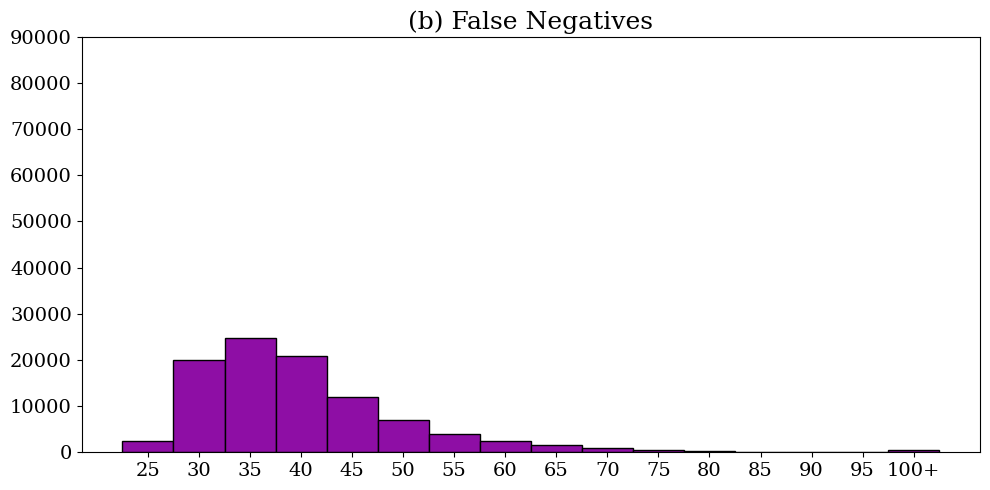

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define bins and labels
bins = np.append(np.arange(25, 105, 5), [np.inf])
labels = [f"{int(bins[i])}" if bins[i+1] != np.inf else "100+" for i in range(len(bins)-1)]

import pandas as pd

# Create a binned column
unc_counties['unc_bin'] = pd.cut(unc_counties['unc'], bins=bins, labels=labels, right=False)

# Count how many in each bin
bin_counts = unc_counties['unc_bin'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
plt.bar(bin_counts.index.astype(str), bin_counts.values, width=1.0, color='#8E0EA5', edgecolor='black')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim(0,90000)
plt.xlabel('', fontsize=16)
plt.ylabel('', fontsize=16)
plt.title('(b) False Negatives', fontsize=18)
#plt.xticks(rotation=45)
plt.rcParams["font.family"] = "serif"
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd
dvs = pd.read_csv('/data/acker/EPA_DV/site_DVs_2021-2023.csv')
dvs

,State Name,County Name,CBSA Name,CSA Name,EPA Region,AQS Site ID,Local Site Name,Site Latitude,Site Longitude,Valid DV,Invalid DV,2021 Annual Mean Value (µg/m3),2022 Annual Mean Value (µg/m3),2023 Annual Mean Value (µg/m3)
0,Alabama,Baldwin,"Daphne-Fairhope-Foley, AL","Mobile-Daphne-Fairhope, AL",4,10030010,"Fairhope, Alabama",30.497478,-87.880258,7.4,NaN,7.28,7.33,7.60
1,Alabama,Clay,,,4,10270001,Ashland,33.284928,-85.803608,7.3,NaN,6.81,6.89,8.10
2,Alabama,DeKalb,,,4,10491003,Crossville,34.288567,-85.969858,7.8,NaN,7.75,6.86,8.89
3,Alabama,Etowah,"Gadsden, AL",,4,10550010,Gadsden C. College,33.988210,-85.992556,NaN,8.8,8.38,8.20,9.82
4,Alabama,Jefferson,"Birmingham-Hoover, AL","Birmingham-Hoover-Talladega, AL",4,10730023,North Birmingham,33.553056,-86.815000,9.6,NaN,9.71,9.00,10.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,Puerto Rico,Fajardo,"San Juan-Carolina-Caguas, PR","San Juan-Carolina, PR",2,720530003,Fajardo,18.383983,-65.618888,NaN,7.1,7.20,7.20,6.86
1056,Puerto Rico,Guayama,"Guayama, PR","San Juan-Carolina, PR",2,720570012,,17.955378,-66.162122,NaN,5.6,7.02,4.17,NaN
1057,Puerto Rico,Guaynabo,"San Juan-Carolina-Caguas, PR","San Juan-Carolina, PR",2,720610005,Guaynabo,18.440095,-66.114460,NaN,7.5,8.00,7.54,7.06
1058,Puerto Rico,Ponce,"Ponce, PR","Ponce-Coamo-Santa Isabel, PR",2,721130004,Residential Area,18.009558,-66.627249,NaN,6.7,6.96,6.74,6.33


In [15]:
dvs.columns

Index(['State Name', 'County Name', 'CBSA Name', 'CSA Name', 'EPA Region',
       'AQS Site ID', 'Local Site Name', 'Site Latitude', 'Site Longitude',
       'Valid DV ', 'Invalid DV', '2021 Annual Mean Value (µg/m3)',
       '2022 Annual Mean Value (µg/m3)', '2023 Annual Mean Value (µg/m3)'],
      dtype='object')

In [16]:
import numpy as np
valid = dvs.dropna(subset=['Valid DV '])
valid

,State Name,County Name,CBSA Name,CSA Name,EPA Region,AQS Site ID,Local Site Name,Site Latitude,Site Longitude,Valid DV,Invalid DV,2021 Annual Mean Value (µg/m3),2022 Annual Mean Value (µg/m3),2023 Annual Mean Value (µg/m3)
0,Alabama,Baldwin,"Daphne-Fairhope-Foley, AL","Mobile-Daphne-Fairhope, AL",4,10030010,"Fairhope, Alabama",30.497478,-87.880258,7.4,NaN,7.28,7.33,7.60
1,Alabama,Clay,,,4,10270001,Ashland,33.284928,-85.803608,7.3,NaN,6.81,6.89,8.10
2,Alabama,DeKalb,,,4,10491003,Crossville,34.288567,-85.969858,7.8,NaN,7.75,6.86,8.89
4,Alabama,Jefferson,"Birmingham-Hoover, AL","Birmingham-Hoover-Talladega, AL",4,10730023,North Birmingham,33.553056,-86.815000,9.6,NaN,9.71,9.00,10.07
5,Alabama,Jefferson,"Birmingham-Hoover, AL","Birmingham-Hoover-Talladega, AL",4,10731005,Mcadory,33.331111,-87.003611,8.4,NaN,8.18,8.02,8.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,Wyoming,Sheridan,"Sheridan, WY",,8,560330002,Sheridan - Police Sta. Slam Site,44.815142,-106.955933,7.0,NaN,6.47,7.73,6.75
1047,Wyoming,Sublette,,,8,560350101,Pinedale Gaseous,42.869824,-109.870760,3.7,NaN,4.68,3.09,3.37
1050,Wyoming,Teton,"Jackson, WY-ID",,8,560391006,Jackson Slam Site,43.457760,-110.797990,3.1,NaN,4.94,2.74,1.71
1051,Wyoming,Teton,"Jackson, WY-ID",,8,560391013,Yellowstone National Park - Old Faithful Snow ...,44.373056,-110.830833,4.0,NaN,5.08,4.06,2.77


In [17]:
valid['geometry'] = gpd.points_from_xy(valid['Site Longitude'], valid['Site Latitude'])
valid = gpd.GeoDataFrame(valid, geometry="geometry", crs="EPSG:4269")
valid

/tmp/ipykernel_5573/3099035182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['geometry'] = gpd.points_from_xy(valid['Site Longitude'], valid['Site Latitude'])


,State Name,County Name,CBSA Name,CSA Name,EPA Region,AQS Site ID,Local Site Name,Site Latitude,Site Longitude,Valid DV,Invalid DV,2021 Annual Mean Value (µg/m3),2022 Annual Mean Value (µg/m3),2023 Annual Mean Value (µg/m3),geometry
0,Alabama,Baldwin,"Daphne-Fairhope-Foley, AL","Mobile-Daphne-Fairhope, AL",4,10030010,"Fairhope, Alabama",30.497478,-87.880258,7.4,NaN,7.28,7.33,7.60,POINT (-87.88026 30.49748)
1,Alabama,Clay,,,4,10270001,Ashland,33.284928,-85.803608,7.3,NaN,6.81,6.89,8.10,POINT (-85.80361 33.28493)
2,Alabama,DeKalb,,,4,10491003,Crossville,34.288567,-85.969858,7.8,NaN,7.75,6.86,8.89,POINT (-85.96986 34.28857)
4,Alabama,Jefferson,"Birmingham-Hoover, AL","Birmingham-Hoover-Talladega, AL",4,10730023,North Birmingham,33.553056,-86.815000,9.6,NaN,9.71,9.00,10.07,POINT (-86.815 33.55306)
5,Alabama,Jefferson,"Birmingham-Hoover, AL","Birmingham-Hoover-Talladega, AL",4,10731005,Mcadory,33.331111,-87.003611,8.4,NaN,8.18,8.02,8.99,POINT (-87.00361 33.33111)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,Wyoming,Sheridan,"Sheridan, WY",,8,560330002,Sheridan - Police Sta. Slam Site,44.815142,-106.955933,7.0,NaN,6.47,7.73,6.75,POINT (-106.95593 44.81514)
1047,Wyoming,Sublette,,,8,560350101,Pinedale Gaseous,42.869824,-109.870760,3.7,NaN,4.68,3.09,3.37,POINT (-109.87076 42.86982)
1050,Wyoming,Teton,"Jackson, WY-ID",,8,560391006,Jackson Slam Site,43.457760,-110.797990,3.1,NaN,4.94,2.74,1.71,POINT (-110.79799 43.45776)
1051,Wyoming,Teton,"Jackson, WY-ID",,8,560391013,Yellowstone National Park - Old Faithful Snow ...,44.373056,-110.830833,4.0,NaN,5.08,4.06,2.77,POINT (-110.83083 44.37306)


In [18]:
merged_df_2 = gpd.sjoin(valid, FN, how="left", predicate="within")
# Count monitors per county (assuming counties have a unique ID, like 'GEOID' or 'county_name')
monitor_counts = merged_df_2.groupby("GEOID").size().reset_index(name='monitor_count')
monitor_counts

,GEOID,monitor_count
0,01113,1
1,04021,3
2,04023,1
3,05139,1
4,06013,2
5,06045,2
6,06071,5
7,06085,3
8,06101,1
9,13021,2


In [19]:
'''# Spatial join: assign each monitor to a county
merged_df_2 = gpd.sjoin(valid, merged_df, how="left", predicate="within")

# Group by county and aggregate
monitor_counts = (
    merged_df_2.groupby("GEOID")
    .agg(
        monitor_count=('geometry', 'size'),         # Count of monitors
        valid_dv_max=('Valid DV ', 'max')          # Example: max Valid DV per county
    )
    .reset_index()
)
monitor_counts'''

'# Spatial join: assign each monitor to a county\nmerged_df_2 = gpd.sjoin(valid, merged_df, how="left", predicate="within")\n\n# Group by county and aggregate\nmonitor_counts = (\n    merged_df_2.groupby("GEOID")\n    .agg(\n        monitor_count=(\'geometry\', \'size\'),         # Count of monitors\n        valid_dv_max=(\'Valid DV \', \'max\')          # Example: max Valid DV per county\n    )\n    .reset_index()\n)\nmonitor_counts'

In [20]:
# Merge monitor counts into counties GeoDataFrame
counties_with_monitor_counts = FN.merge(monitor_counts, on="GEOID", how="left")

# Fill NaNs (counties with 0 monitors)
counties_with_monitor_counts['monitor_count'] = counties_with_monitor_counts['monitor_count'].fillna(1).astype(int)
counties_with_monitor_counts

,index,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,ID,Design Value,geometry,diff,classification,cdve_diff,near_miss1,cdv_diff,near_miss2,monitor_count
0,108,20209,9.000000,20,209,172,20_209,9.6,"POLYGON ((-94.90883 39.04342, -94.9088 39.0579...",-0.600000,FN,0.000000,True,0.6,False,1
1,112,47037,8.983334,47,037,182,47_037,9.6,"MULTIPOLYGON (((-86.52256 36.14128, -86.52106 ...",-0.616666,FN,0.016666,True,0.6,False,2
2,114,26081,8.966666,26,081,187,26_081,9.3,"POLYGON ((-85.79061 43.20987, -85.79056 43.226...",-0.333334,FN,0.033334,True,0.3,True,1
3,115,22121,8.966666,22,121,187,22_121,9.1,"POLYGON ((-91.48156 30.49742, -91.48173 30.511...",-0.133334,FN,0.033334,True,0.1,True,1
4,116,28035,8.966666,28,035,187,28_035,9.2,"POLYGON ((-89.45162 31.43403, -89.44455 31.434...",-0.233334,FN,0.033334,True,0.2,True,1
5,119,37119,8.933333,37,119,196,37_119,9.2,"POLYGON ((-81.05803 35.07319, -81.05768 35.078...",-0.266667,FN,0.066667,True,0.2,True,3
6,124,30053,8.900001,30,053,205,30_053,12.8,"POLYGON ((-116.04914 48.50205, -116.04913 48.5...",-3.899999,FN,0.099999,True,3.8,False,1
7,125,18141,8.866667,18,141,210,18_141,9.4,"POLYGON ((-86.52648 41.65768, -86.52601 41.672...",-0.533333,FN,0.133333,True,0.4,True,1
8,127,13245,8.866667,13,245,210,13_245,9.7,"POLYGON ((-82.3503 33.3148, -82.33028 33.32901...",-0.833333,FN,0.133333,True,0.7,False,1
9,128,06013,8.866666,06,013,217,06_013,9.6,"POLYGON ((-122.42976 37.9654, -122.42904 37.96...",-0.733334,FN,0.133334,True,0.6,False,2


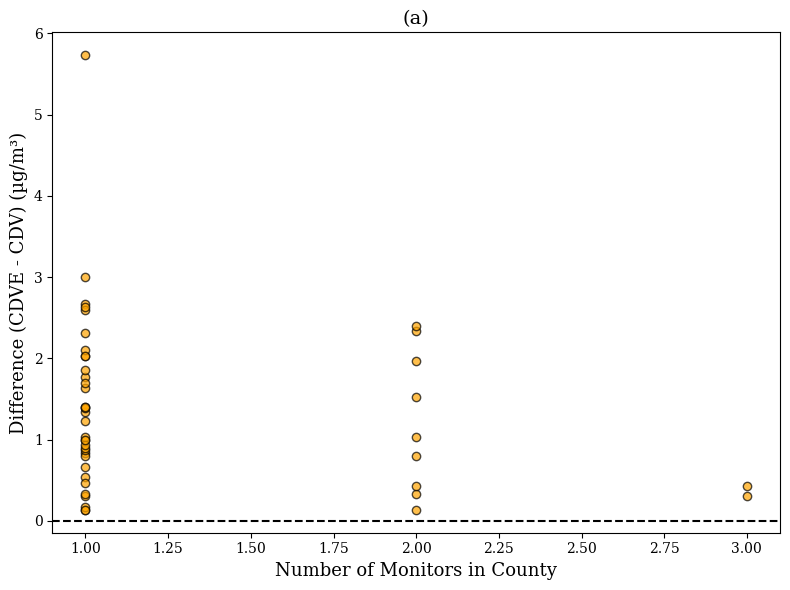

In [25]:
import matplotlib.pyplot as plt

# Color mapping
colors = {
    'TP': 'green',
    'FP': 'red',
    'FN': 'orange',
    'TN': 'blue'
}

plt.figure(figsize=(8, 6))

# Grouped scatter by classification
for label, group in counties_with_monitor_counts.groupby('classification'):
    plt.scatter(
        group['monitor_count'],
        group['diff'],
        alpha=0.7,
        edgecolors='k',
        label=label,
        color=colors.get(label, 'gray')
    )

# Add horizontal line at y = 0
plt.axhline(0, linestyle='--', color='black')

# Labels and formatting
plt.rcParams["font.family"] = "serif"
plt.xlabel('Number of Monitors in County', fontsize=13)
plt.ylabel('Difference (CDVE - CDV) (µg/m³)', fontsize=13)
plt.title('(a)', fontsize=14)

plt.grid(False)
#plt.legend(title='Classification')
plt.tight_layout()
plt.show()


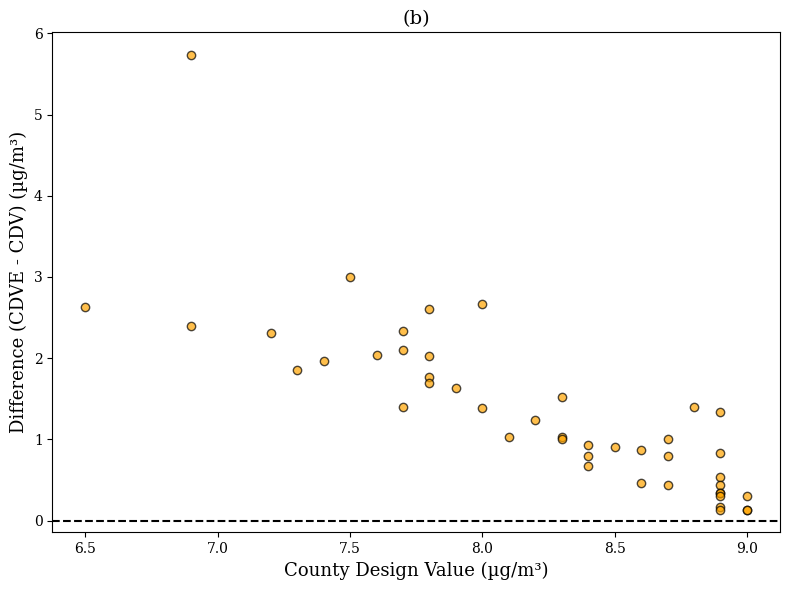

In [26]:
import matplotlib.pyplot as plt

# Define color mapping for classification
colors = {
    'TP': 'green',
    'FP': 'red',
    'FN': 'orange',
    'TN': 'blue'
}

plt.figure(figsize=(8, 6))

# Plot grouped by classification
for label, group in counties_with_monitor_counts.groupby('classification'):
    plt.scatter(
        group['Design Value'],     # x-axis
        group['diff'],             # y-axis
        alpha=0.7,
        edgecolors='k',
        label=label,
        color=colors.get(label, 'gray')
    )

# Add horizontal line at y = 0
plt.axhline(0, linestyle='--', color='black')

# Labels and formatting
plt.rcParams["font.family"] = "serif"
plt.xlabel('County Design Value (µg/m³)', fontsize=13)
plt.ylabel('Difference (CDVE - CDV) (µg/m³)', fontsize=13)
plt.title('(b)', fontsize=14)

plt.grid(False)
#plt.legend(title='Classification')
plt.tight_layout()
plt.show()


In [27]:
# Reproject to an equal-area CRS (if not already)
counties_with_monitor_counts = counties_with_monitor_counts.to_crs(epsg=5070)

# Compute area in square kilometers
counties_with_monitor_counts['area_km2'] = counties_with_monitor_counts.geometry.area / 1e6
counties_with_monitor_counts = counties_with_monitor_counts.to_crs(epsg=4269)

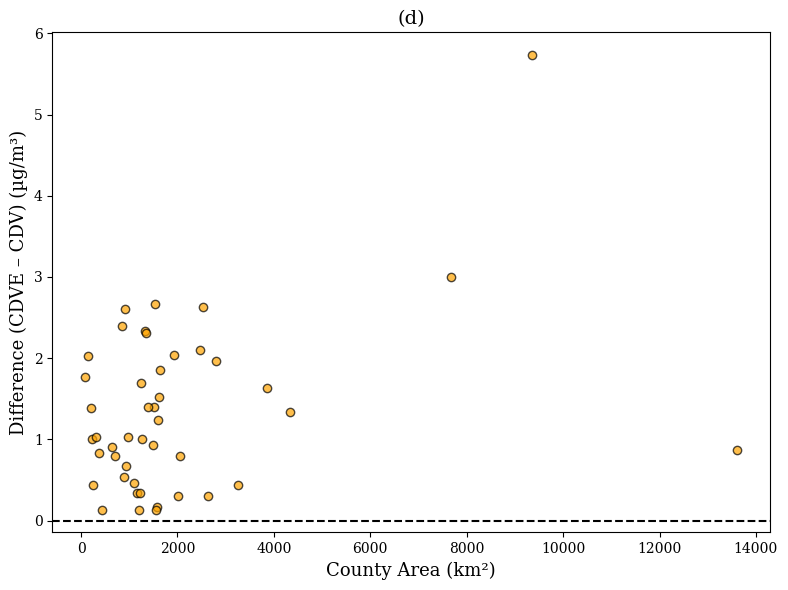

In [28]:
import matplotlib.pyplot as plt

# Define color mapping
colors = {
    'TP': 'green',
    'FP': 'red',
    'FN': 'orange',
    'TN': 'blue'
}

plt.figure(figsize=(8, 6))

# Scatter plot grouped by classification
for label, group in counties_with_monitor_counts.groupby('classification'):
    plt.scatter(
        group['area_km2'],         # x-axis
        group['diff'],             # y-axis
        alpha=0.7,
        edgecolors='k',
        label=label,
        color=colors.get(label, 'gray')
    )

# Reference line at y = 0
plt.axhline(0, linestyle='--', color='black')

# Labels and formatting
plt.rcParams["font.family"] = "serif"
plt.xlabel('County Area (km²)', fontsize=13)
plt.ylabel('Difference (CDVE – CDV) (µg/m³)', fontsize=13)
plt.title('(d)', fontsize=14)
plt.grid(False)

# Horizontal legend below
'''plt.legend(
    title='Classification',
    loc='lower center',
    bbox_to_anchor=(0.5, -0.25),
    ncol=4,
    frameon=False
)'''

plt.tight_layout()
plt.show()


In [57]:
removed = gpd.read_file('/data/acker/ALA/paper2/GL_removed_pixels_2021-2023_grids.shp')
removed

,removed,lat,lon,geometry
0,93.502815,14.195000,-90.525002,"POLYGON ((-90.525 14.195, -90.525 14.205, -90...."
1,102.857147,14.195000,-90.514999,"POLYGON ((-90.515 14.195, -90.515 14.205, -90...."
2,102.586212,14.195000,-90.504997,"POLYGON ((-90.505 14.195, -90.505 14.205, -90...."
3,97.159096,14.195000,-90.495003,"POLYGON ((-90.495 14.195, -90.495 14.205, -90...."
4,91.258743,14.205000,-90.574997,"POLYGON ((-90.575 14.205, -90.575 14.215, -90...."
...,...,...,...,...
2998275,1004.444397,67.985001,-50.055000,"POLYGON ((-50.055 67.985, -50.055 67.995, -50...."
2998276,1023.333313,67.985001,-50.044998,"POLYGON ((-50.045 67.985, -50.045 67.995, -50...."
2998277,1023.333313,67.985001,-50.035000,"POLYGON ((-50.035 67.985, -50.035 67.995, -50...."
2998278,1029.444458,67.985001,-50.025002,"POLYGON ((-50.025 67.985, -50.025 67.995, -50...."


In [59]:
rem_counties = gpd.sjoin(removed, counties_with_monitor_counts, how='inner', predicate='intersects')
rem_counties

,removed,lat,lon,geometry,index_right0,index,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,ID,Design Value,diff,classification,monitor_count
6954,104.647438,19.395000,-155.604996,"POLYGON ((-155.605 19.395, -155.605 19.405, -1...",533,533,15001,3.633333,15,001,3133,15_001,4.4,-0.766667,TN,5
6955,93.888893,19.395000,-155.595001,"POLYGON ((-155.595 19.395, -155.595 19.405, -1...",533,533,15001,3.633333,15,001,3133,15_001,4.4,-0.766667,TN,5
6956,91.875000,19.405001,-155.634995,"POLYGON ((-155.63499 19.405, -155.63499 19.415...",533,533,15001,3.633333,15,001,3133,15_001,4.4,-0.766667,TN,5
6957,93.333336,19.405001,-155.625000,"POLYGON ((-155.625 19.405, -155.625 19.415, -1...",533,533,15001,3.633333,15,001,3133,15_001,4.4,-0.766667,TN,5
6958,93.333336,19.405001,-155.615005,"POLYGON ((-155.61501 19.405, -155.61501 19.415...",533,533,15001,3.633333,15,001,3133,15_001,4.4,-0.766667,TN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899193,90.797546,65.205002,-147.994995,"POLYGON ((-147.995 65.205, -147.995 65.215, -1...",0,0,02090,14.333333,02,090,1,02_090,12.1,2.233333,TP,3
1899194,91.411041,65.205002,-147.985001,"POLYGON ((-147.985 65.205, -147.985 65.215, -1...",0,0,02090,14.333333,02,090,1,02_090,12.1,2.233333,TP,3
1899195,93.827148,65.205002,-147.975006,"POLYGON ((-147.97501 65.205, -147.97501 65.215...",0,0,02090,14.333333,02,090,1,02_090,12.1,2.233333,TP,3
1899196,92.024544,65.205002,-147.964996,"POLYGON ((-147.965 65.205, -147.965 65.215, -1...",0,0,02090,14.333333,02,090,1,02_090,12.1,2.233333,TP,3


In [61]:
total_removed_per_county = rem_counties.groupby('GEOID').size().reset_index(name='removed_grids')
final_df_1 = counties_with_monitor_counts.merge(total_removed_per_county, on='GEOID', how='left')
final_df_1

,index,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,ID,Design Value,geometry,diff,classification,monitor_count,removed_grids
0,0,02090,14.333333,02,090,1,02_090,12.1,"POLYGON ((-148.66326 64.59079, -148.64821 64.5...",2.233333,TP,3,4254.0
1,1,06063,14.200000,06,063,2,06_063,14.0,"POLYGON ((-121.49703 40.43702, -121.49487 40.4...",0.200000,TP,1,636.0
2,2,06107,12.933334,06,107,4,06_107,15.7,"POLYGON ((-119.56647 36.49434, -119.56366 36.4...",-2.766666,TP,1,1365.0
3,3,06023,12.633334,06,023,5,06_023,6.9,"POLYGON ((-124.4086 40.4432, -124.39664 40.462...",5.733334,FN,1,680.0
4,4,06029,12.599999,06,029,6,06_029,16.2,"POLYGON ((-120.19437 35.78936, -120.00308 35.7...",-3.600001,TP,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,531,02020,4.133333,02,020,3118,02_020,5.1,"MULTIPOLYGON (((-150.07348 61.15834, -150.0691...",-0.966667,TN,1,3534.0
532,532,02110,3.900000,02,110,3128,02_110,4.6,"MULTIPOLYGON (((-134.66932 58.33327, -134.6675...",-0.700000,TN,1,7984.0
533,533,15001,3.633333,15,001,3133,15_001,4.4,"POLYGON ((-156.06147 19.72813, -156.06076 19.7...",-0.766667,TN,5,72.0
534,534,15009,3.556667,15,009,3136,15_009,4.0,"MULTIPOLYGON (((-156.69742 20.91637, -156.6957...",-0.443333,TN,1,141.0


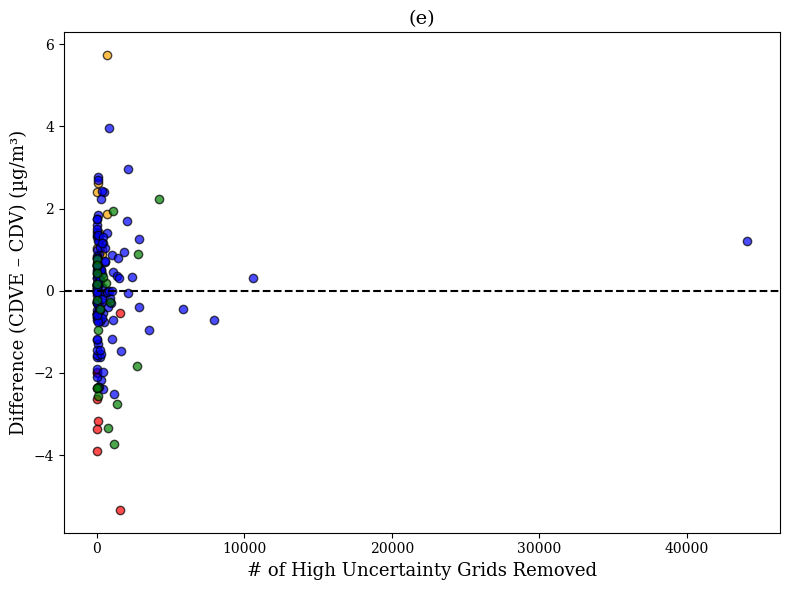

In [63]:
import matplotlib.pyplot as plt

# Define color mapping
colors = {
    'TP': 'green',
    'FP': 'red',
    'FN': 'orange',
    'TN': 'blue'
}

plt.figure(figsize=(8, 6))

# Scatter plot grouped by classification
for label, group in final_df_1.groupby('classification'):
    plt.scatter(
        group['removed_grids'],         # x-axis
        group['diff'],             # y-axis
        alpha=0.7,
        edgecolors='k',
        label=label,
        color=colors.get(label, 'gray')
    )

# Reference line at y = 0
plt.axhline(0, linestyle='--', color='black')

# Labels and formatting
plt.rcParams["font.family"] = "serif"
plt.xlabel('# of High Uncertainty Grids Removed', fontsize=13)
plt.ylabel('Difference (CDVE – CDV) (µg/m³)', fontsize=13)
plt.title('(e)', fontsize=14)
plt.grid(False)

# Horizontal legend below
'''plt.legend(
    title='Classification',
    loc='lower center',
    bbox_to_anchor=(0.5, -0.25),
    ncol=4,
    frameon=False
)'''

plt.tight_layout()
plt.show()


In [21]:
df = gpd.read_file('/data/acker/ALA/paper2/GL_2021-2023_grids.shp')
df

,value,lat,lon,geometry
0,15.533333,10.005000,-85.724998,"POLYGON ((-85.725 10.005, -85.725 10.015, -85...."
1,15.666667,10.005000,-85.714996,"POLYGON ((-85.715 10.005, -85.715 10.015, -85...."
2,15.666667,10.005000,-85.705002,"POLYGON ((-85.705 10.005, -85.705 10.015, -85...."
3,14.700000,10.005000,-85.695000,"POLYGON ((-85.695 10.005, -85.695 10.015, -85...."
4,14.266666,10.005000,-85.684998,"POLYGON ((-85.685 10.005, -85.685 10.015, -85...."
...,...,...,...,...
25002341,1.400000,67.985001,-51.395000,"POLYGON ((-51.395 67.985, -51.395 67.995, -51...."
25002342,1.400000,67.985001,-51.384998,"POLYGON ((-51.385 67.985, -51.385 67.995, -51...."
25002343,1.400000,67.985001,-51.375000,"POLYGON ((-51.375 67.985, -51.375 67.995, -51...."
25002344,1.400000,67.985001,-51.355000,"POLYGON ((-51.355 67.985, -51.355 67.995, -51...."


In [22]:
df = df.to_crs(epsg=4269)

In [23]:
joined = gpd.sjoin(df, counties_with_monitor_counts, how='left', predicate='intersects')
joined

,value,lat,lon,geometry,index_right0,index,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,ID,Design Value,diff,classification,cdve_diff,near_miss1,cdv_diff,near_miss2,monitor_count
0,15.533333,10.005000,-85.724998,"POLYGON ((-85.725 10.005, -85.725 10.015, -85....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15.666667,10.005000,-85.714996,"POLYGON ((-85.715 10.005, -85.715 10.015, -85....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15.666667,10.005000,-85.705002,"POLYGON ((-85.705 10.005, -85.705 10.015, -85....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14.700000,10.005000,-85.695000,"POLYGON ((-85.695 10.005, -85.695 10.015, -85....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14.266666,10.005000,-85.684998,"POLYGON ((-85.685 10.005, -85.685 10.015, -85....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25002341,1.400000,67.985001,-51.395000,"POLYGON ((-51.395 67.985, -51.395 67.995, -51....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25002342,1.400000,67.985001,-51.384998,"POLYGON ((-51.385 67.985, -51.385 67.995, -51....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25002343,1.400000,67.985001,-51.375000,"POLYGON ((-51.375 67.985, -51.375 67.995, -51....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25002344,1.400000,67.985001,-51.355000,"POLYGON ((-51.355 67.985, -51.355 67.995, -51....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
grids = joined.dropna(subset=['value','GEOID'])

In [25]:
grids = grids.drop(columns=['index_right0'])

In [26]:
monitors_with_grid = gpd.sjoin(valid, grids, how="inner", predicate="within")

# Now each monitor has the grid cell + county info it falls within


In [27]:
total_grids_per_county = grids.groupby('GEOID').size().reset_index(name='total_grids')


In [28]:
# Keep unique grid geometries with monitors
grids_with_monitor = monitors_with_grid.drop_duplicates(subset='geometry')

# Count how many unique grid cells have a monitor in each county
monitor_grids_per_county = grids_with_monitor.groupby('GEOID').size().reset_index(name='grids_with_monitor')


In [37]:
coverage_df = total_grids_per_county.merge(monitor_grids_per_county, on='GEOID', how='left')
coverage_df['grids_with_monitor'] = coverage_df['grids_with_monitor'].fillna(0)

coverage_df['monitor_coverage_pct'] = 100 * coverage_df['grids_with_monitor'] / coverage_df['total_grids']


In [38]:
coverage_df['monitor_coverage_pct'].describe()

count    45.000000
mean      0.155546
std       0.180404
min       0.000000
25%       0.059773
50%       0.086430
75%       0.141376
max       0.833333
Name: monitor_coverage_pct, dtype: float64

In [39]:
final_df = counties_with_monitor_counts.merge(coverage_df, on='GEOID', how='left')

final_df

,index,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,ID,Design Value,geometry,diff,classification,cdve_diff,near_miss1,cdv_diff,near_miss2,monitor_count,area_km2,total_grids,grids_with_monitor,monitor_coverage_pct
0,3,06023,12.633334,06,023,5,06_023,6.9,"POLYGON ((-124.4086 40.4432, -124.39664 40.462...",5.733334,FN,3.633334,False,2.1,False,1,9351.972148,10107,1.0,0.009894
1,16,28047,10.666667,28,047,21,28_047,8.0,"MULTIPOLYGON (((-88.86677 30.38297, -88.8655 3...",2.666667,FN,1.666667,False,1.0,False,1,1524.637777,1529,1.0,0.065402
2,23,06103,10.500000,06,103,29,06_103,7.5,"POLYGON ((-123.06543 40.28697, -123.06073 40.2...",3.000000,FN,1.500000,False,1.5,False,1,7673.003672,8387,1.0,0.011923
3,28,22071,10.400001,22,071,34,22_071,7.8,"POLYGON ((-90.14007 29.9479, -90.1376 29.95149...",2.600001,FN,1.400001,False,1.2,False,1,901.396540,618,0.0,0.000000
4,31,06007,10.233334,06,007,38,06_007,8.9,"POLYGON ((-122.06874 39.84222, -122.06694 39.8...",1.333334,FN,1.233334,False,0.1,True,1,4343.959600,4777,1.0,0.020934
5,32,40143,10.200000,40,143,40,40_143,8.8,"POLYGON ((-96.29791 36.07605, -96.2979 36.1048...",1.400000,FN,1.200000,False,0.2,True,1,1519.845735,1606,1.0,0.062267
6,35,22051,10.033333,22,051,45,22_051,7.7,"MULTIPOLYGON (((-89.95023 29.27704, -89.94302 ...",2.333333,FN,1.033333,False,1.3,False,2,1321.418938,1033,3.0,0.290416
7,39,34017,9.823333,34,017,56,34_017,7.8,"MULTIPOLYGON (((-74.0422 40.69997, -74.039 40....",2.023333,FN,0.823333,False,1.2,False,1,135.745324,195,1.0,0.512821
8,40,24005,9.820000,24,005,57,24_005,8.3,"MULTIPOLYGON (((-76.3257 39.31397, -76.32452 3...",1.520000,FN,0.820000,False,0.7,False,2,1608.946974,1842,2.0,0.108578
9,41,48121,9.800000,48,121,58,48_121,7.7,"POLYGON ((-97.39826 32.99996, -97.39792 33.013...",2.100000,FN,0.800000,False,1.3,False,1,2464.738948,2421,1.0,0.041305


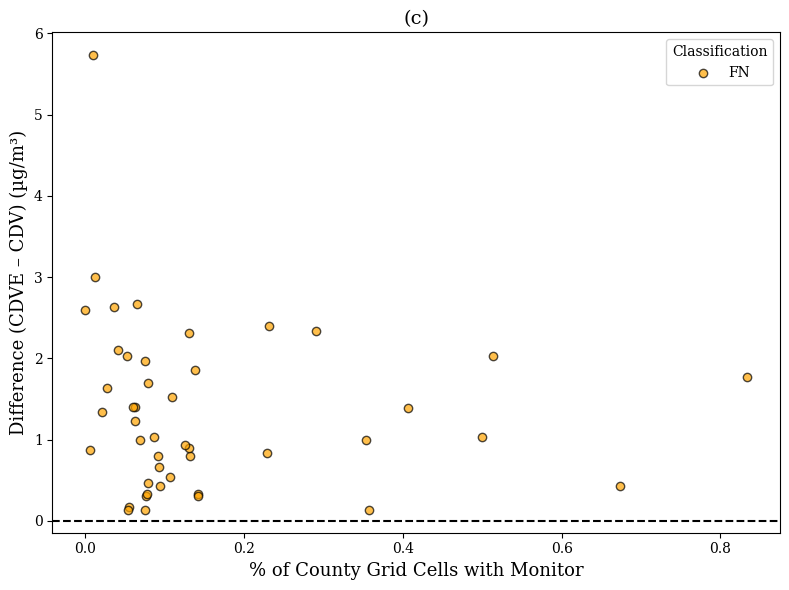

In [40]:
import matplotlib.pyplot as plt

# Define color mapping for classification
colors = {
    'TP': 'green',
    'FP': 'red',
    'FN': 'orange',
    'TN': 'blue'
}

plt.figure(figsize=(8, 6))

# Scatter plot grouped by classification
for label, group in final_df.groupby('classification'):
    plt.scatter(
        group['monitor_coverage_pct'],  # x-axis
        group['diff'],                  # y-axis
        alpha=0.7,
        edgecolors='k',
        label=label,
        color=colors.get(label, 'gray')
    )

# Add horizontal line at y = 0
plt.axhline(0, linestyle='--', color='black')

# Labels and formatting
plt.rcParams["font.family"] = "serif"
plt.xlabel('% of County Grid Cells with Monitor', fontsize=13)
plt.ylabel('Difference (CDVE – CDV) (µg/m³)', fontsize=13)
plt.title('(c)', fontsize=14)
plt.grid(False)
plt.legend(title='Classification')
plt.tight_layout()
plt.show()



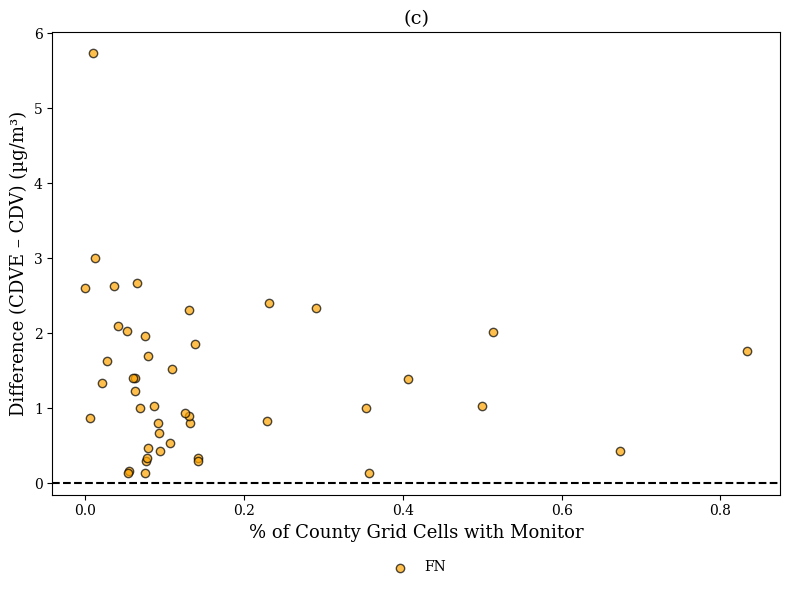

In [41]:
import matplotlib.pyplot as plt

# Define color mapping for classification
colors = {
    'TP': 'green',
    'FP': 'red',
    'FN': 'orange',
    'TN': 'blue'
}

plt.figure(figsize=(8, 6))

# Scatter plot grouped by classification
for label, group in final_df.groupby('classification'):
    plt.scatter(
        group['monitor_coverage_pct'],  # x-axis
        group['diff'],                  # y-axis
        alpha=0.7,
        edgecolors='k',
        label=label,
        color=colors.get(label, 'gray')
    )

# Add horizontal line at y = 0
plt.axhline(0, linestyle='--', color='black')

# Labels and formatting
plt.rcParams["font.family"] = "serif"
plt.xlabel('% of County Grid Cells with Monitor', fontsize=13)
plt.ylabel('Difference (CDVE – CDV) (µg/m³)', fontsize=13)
plt.title('(c)', fontsize=14)
plt.grid(False)

# Horizontal legend below plot
plt.legend(
    title=None,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.2),
    ncol=4,
    frameon=False
)

plt.tight_layout()
plt.show()


In [29]:
merged_df_2 = merged_df_2.to_crs(epsg=5070)
highest_monitor = (
    merged_df_2.sort_values('Valid DV ', ascending=False)
    .drop_duplicates('GEOID')
    .rename(columns={'geometry': 'monitor_geom'})
    [['GEOID', 'Valid DV ', 'monitor_geom']]
)


In [30]:
grids.columns

Index(['value', 'lat', 'lon', 'geometry', 'index', 'GEOID', 'PM25_90th',
       'STATEFP', 'COUNTYFP', 'CDVE_rank', 'ID', 'Design Value', 'diff',
       'classification', 'cdve_diff', 'near_miss1', 'cdv_diff', 'near_miss2',
       'monitor_count'],
      dtype='object')

In [31]:
grids = grids.to_crs(epsg=5070)
highest_grid = (
    grids.sort_values('PM25_90th', ascending=False)
    .drop_duplicates('GEOID')
    .rename(columns={'geometry': 'grid_geom'})
    [['GEOID', 'PM25_90th', 'grid_geom']]
)


In [32]:
from shapely.geometry import Point

# Merge the two
comparison_df = highest_monitor.merge(highest_grid, on='GEOID', how='inner')

# Calculate distance in kilometers
comparison_df['dist_km'] = comparison_df.apply(
    lambda row: row['monitor_geom'].distance(row['grid_geom']) / 1000, axis=1
)


In [33]:
final_plot_df = counties_with_monitor_counts[['GEOID', 'diff','classification']].merge(
    comparison_df[['GEOID', 'dist_km']], on='GEOID', how='inner'
)


In [34]:
final_plot_df['dist_km'].describe()

count     52.000000
mean      33.269942
std       27.627874
min        1.599057
25%       15.420190
50%       25.660607
75%       42.732398
max      134.852208
Name: dist_km, dtype: float64

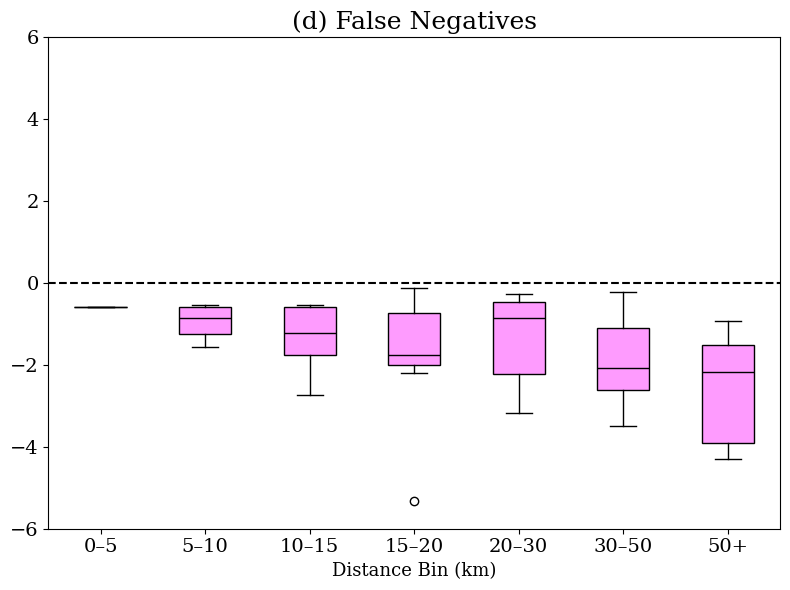

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Filter only False Negatives
fn_df = final_plot_df[final_plot_df['classification'] == 'FN'].copy()

# Define distance bins (e.g., every 5 km up to 50+ km)
bins = [0, 5, 10, 15, 20, 30, 50, np.inf]
labels = ['0–5', '5–10', '10–15', '15–20', '20–30', '30–50', '50+']

# Assign each FN county to a distance bin
fn_df['dist_bin'] = pd.cut(fn_df['dist_km'], bins=bins, labels=labels, right=False)

# Prepare boxplot data
boxplot_data = [fn_df[fn_df['dist_bin'] == label]['diff'] for label in labels]

# Plot
plt.figure(figsize=(8, 6))
plt.boxplot(boxplot_data, labels=labels, patch_artist=True,
            boxprops=dict(facecolor='#fe9bfe', color='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'))

# Labels and formatting
plt.axhline(0, linestyle='--', color='black')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-6,6)
plt.xlabel('Distance Bin (km)', fontsize=13)
plt.ylabel('', fontsize=13)
plt.title('(d) False Negatives', fontsize=18)
plt.rcParams["font.family"] = "serif"
plt.grid(False)
plt.tight_layout()
plt.show()


In [51]:
# Group by distance bin and calculate summary statistics
stats_df = (
    fn_df.groupby('dist_bin')['diff']
    .agg(
        count='count',
        mean='mean',
        std='std',
        min='min',
        max='max',
        median='median'
    )
    .reset_index()
)

# Add range as a new column
stats_df['range'] = stats_df['max'] - stats_df['min']

# Sort by count or range if you want to identify which is largest
stats_df_sorted_by_range = stats_df.sort_values('range', ascending=False)
stats_df_sorted_by_count = stats_df.sort_values('count', ascending=False)

# Display the full table
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)  # Format for cleaner output
print(stats_df)


  dist_bin  count  mean  std  min  max  median  range
0      0–5      4  1.11 0.80 0.13 2.02    1.15   1.89
1     5–10      7  0.90 0.54 0.17 1.77    0.83   1.60
2    10–15      7  1.00 0.63 0.30 2.10    1.03   1.80
3    15–20      6  1.24 1.04 0.13 2.60    1.00   2.47
4    20–30     10  2.06 1.52 0.47 5.73    2.00   5.27
5    30–50      9  1.37 1.00 0.13 3.00    1.33   2.87
6      50+      2  1.25 0.54 0.87 1.63    1.25   0.77


/tmp/ipykernel_2871/672414962.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fn_df.groupby('dist_bin')['diff']
